# SVMを動かしてみる

In [7]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

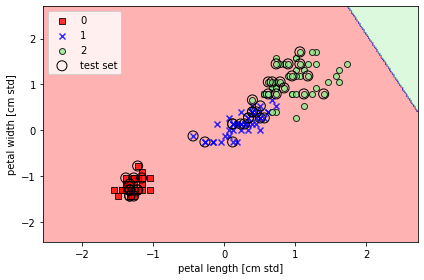

In [9]:
# Irisデータセット
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# データを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 訓練データとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))

# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))

# 線形SVM
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [cm std]')
plt.ylabel('petal width [cm std]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# カーネルSVMを使ってみる

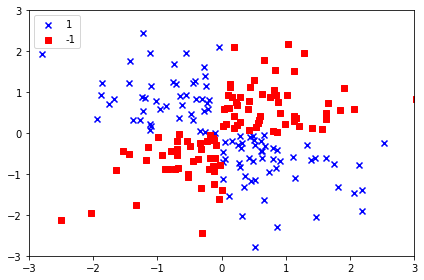

In [12]:
# データセットの準備
np.random.seed(1)

# 標準正規分布に従う200行2列のデータセット
X_xor = np.random.randn(200, 2)
# X_xor

# 排他的論理和を使ってクラスを1,-1に分ける
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# y_xor
y_xor = np.where(y_xor, 1, -1)

# データをプロットしてみる
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
X_xor[y_xor==1, 1]

array([-0.61175641, -2.3015387 , -0.7612069 , -0.24937038, -2.06014071,
       -1.09989127,  1.14472371, -0.68372786,  0.53035547,  0.2344157 ,
        1.6924546 , -0.63699565, -0.35224985,  0.58662319,  1.25286816,
       -0.29809284, -0.07557171, -1.39649634, -2.02220122,  0.82797464,
        0.37756379,  0.04359686,  0.69803203,  1.2245077 ,  0.16938243,
       -0.9537006 ,  0.03261455,  0.31515939, -0.85951594, -1.31228341,
        1.23616403,  0.86334532,  0.5505375 , -0.62353073, -1.14434139,
       -0.10015523, -1.12201873, -0.29664115, -0.17470316, -1.89636092,
        0.90148689, -0.24863478, -0.22631424, -0.28730786, -0.3198016 ,
        0.31354772, -0.0731127 , -1.62743834,  0.82400562,  1.95487808,
        1.9560789 , -0.58652394,  0.87583893, -0.43495668,  2.44936865,
        0.82502982,  0.67471153, -0.44317193, -1.30572692,  1.93752881,
       -1.04458938, -0.6069984 , -1.52568032, -0.37443832, -0.7332716 ,
        1.23225307,  1.39984394,  0.0809271 , -0.68067814,  0.58

↑の感じから線形分離は難しそう  
→射影関数の利用

In [ ]:
# 2次元から3次元のデータへ
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

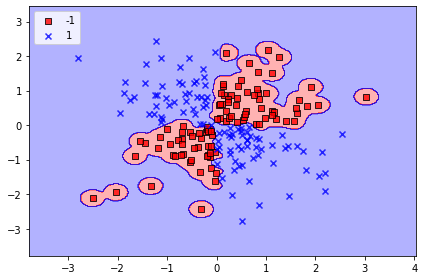

In [21]:
# カーネル関数をつかったSVMの訓練
svm = SVC(kernel='rbf', random_state=1, gamma=50, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()